<a href="https://colab.research.google.com/github/Ashishkumar023/Ecommerce-Sales-Data/blob/main/Student_Exam_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries for data analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading a csv file
df = pd.read_csv('/content/Expanded_data_with_more_features.csv')

# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
# describing the data

df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
# checking the data type in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
#values which are null
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

**Drop Unnamed Column**

In [7]:
#deleting unnamed column

df = df.drop("Unnamed: 0", axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


Gender Distribution

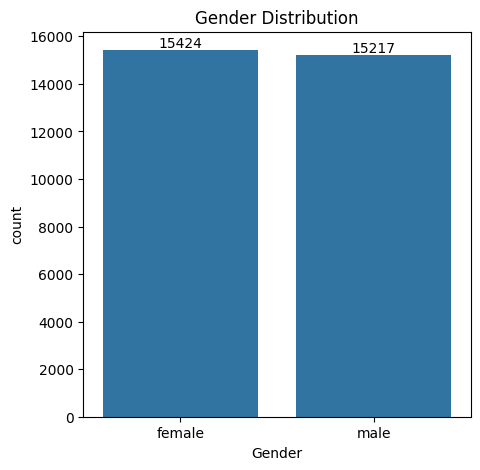

In [19]:
# Using seaborn to make charts based on gender distribution using count plot of seaborn
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

# from the chart below we have analyzed that the no of female count is more than
# the no of male counts

In [14]:
# grouping by on the basis of parents educ
gb = df.groupby('ParentEduc').agg({"MathScore":'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


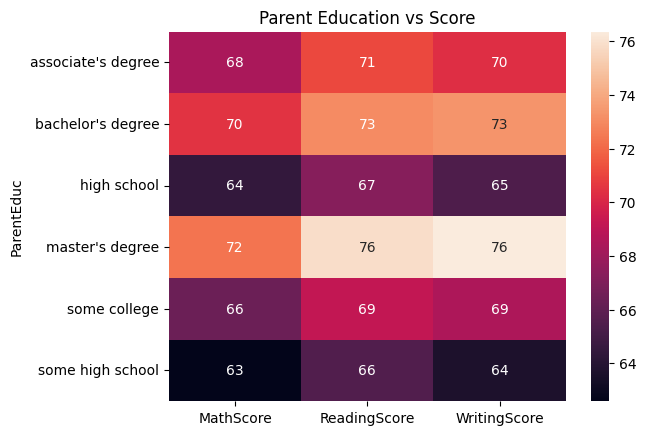

In [20]:
sns.heatmap(gb, annot=True)
plt.title('Parent Education vs Score')
plt.show()

In [ ]:
# Form above chart we havew concluded that there is a lot of impact on students
# score which is directly related to parents education

In [17]:
# gouping on the basis of parent marital status
gb1 = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


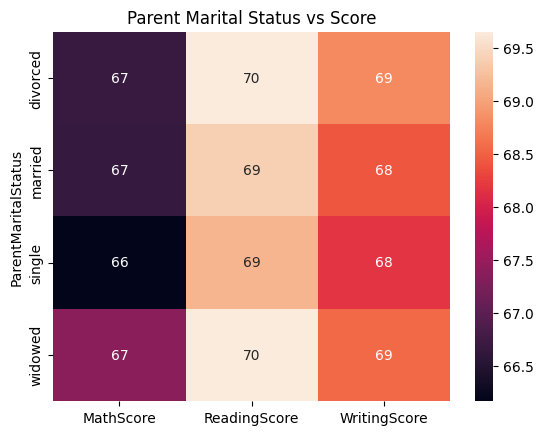

In [21]:
sns.heatmap(gb1, annot=True)
plt.title('Parent Marital Status vs Score')
plt.show()

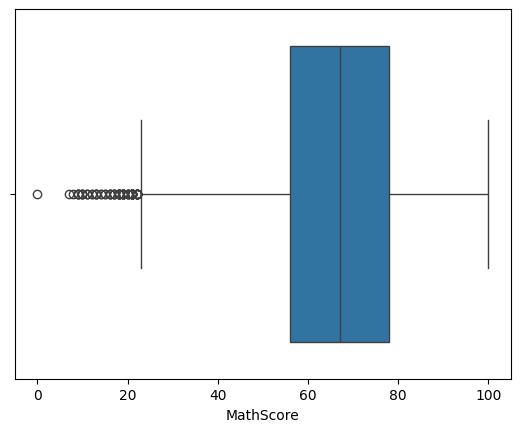

In [24]:
#checking outliers in mathscore
sns.boxplot(data = df, x = "MathScore")
plt.show()

In [25]:
#unique values in dataset
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503]


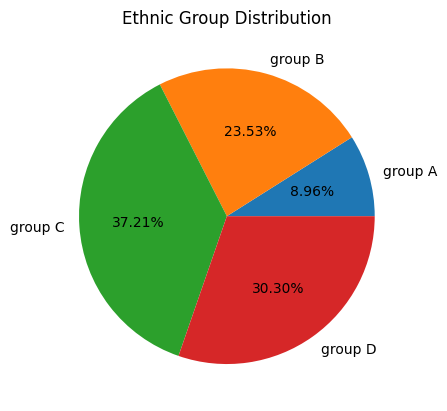

In [33]:
#Distribution of ethinic groups
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()

groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()

groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()

groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()

groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()
l = ['group A', 'group B', 'group C', 'group D']
mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup']]
print(mlist)
plt.pie(mlist, labels = l, autopct='%1.2f%%')
plt.title('Ethnic Group Distribution')
plt.show()

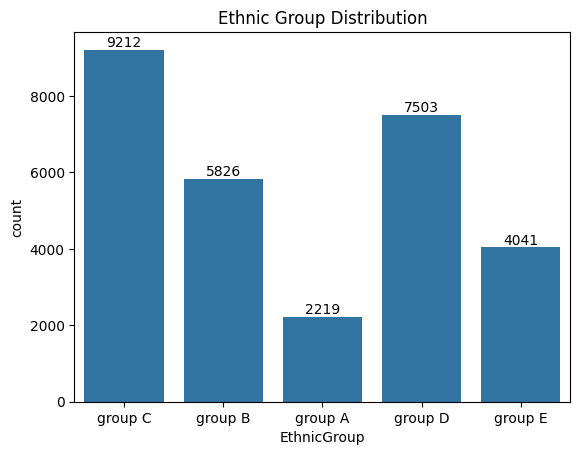

In [35]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.title('Ethnic Group Distribution')
plt.show()